In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

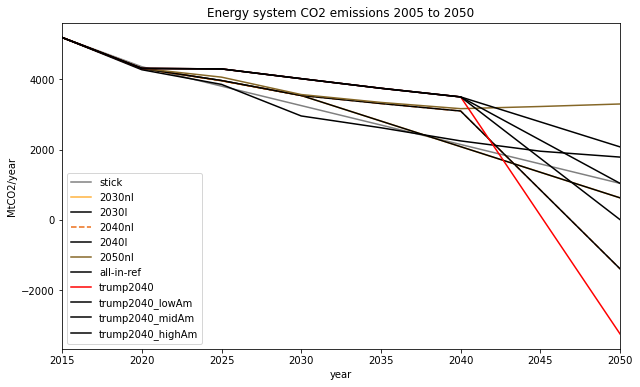

In [2]:
#trajectory
df=pd.read_excel("CO2_accounting_2025_rr2.xlsx",sheet_name='total')
df = df[df['year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
time=df['year']

# Define custom color map
custom_colors = {
    'stick': 'grey',
    '2030nl': '#FFB23D',
    '2040nl': '#EC6D18',
    'trump2040': 'red',
#     'Carrots w/ Slow Stick, Trump 2.0': '#800020',
    '2050nl': '#856727'
}

# Define custom line styles
custom_linestyles = {
    'stick': '-',
    '2030nl': '-',
    '2040nl': '--',
    'trump2040': '-',
#     'Carrots w/ Slow Stick, Trump 2.0': '--',
    '2050nl': '-'
}

# Plot all columns with specified colors and linestyles
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:  # Exclude 'year' column
    color = custom_colors.get(column, 'black')  # Default color is black
    linestyle = custom_linestyles.get(column, '-')  # Default linestyle is solid
    plt.plot(df['year'], df[column], label=column, color=color, linestyle=linestyle)



# Add labels and title
plt.xlabel('year')
plt.ylabel("MtCO2/year")
plt.title('Energy system CO2 emissions 2005 to 2050')
plt.legend()
plt.xlim(2015, 2050)


# plt.title("Energy system CO2 emissions since 2015",  fontsize = 16)
# plt.savefig("RR1_trump.svg")


plt.show()

In [3]:
df2=df.copy()
# df2.index = range(0, 8)
ES=df2['stick']
E2030 = df2['2030nl']
E2040 = df2['2040nl']
# E2030Trump = df2['trump2030']
E2040Trump=df2['trump2040']
E2050=df2['2050nl']
E2040Trump_lowAm=df2['trump2040_lowAm']
E2040Trump_midAm=df2['trump2040_midAm']
E2040Trump_highAm=df2['trump2040_highAm']

In [4]:
df2

,year,stick,2030nl,2030l,2040nl,2040l,2050nl,all-in-ref,trump2040,trump2040_lowAm,trump2040_midAm,trump2040_highAm
0,2015,5188.910680,5188.910681,5188.910681,5188.910681,5188.910681,5188.904110,5188.701955,5188.910680,5188.910680,5188.910680,5188.910680
1,2020,4357.016027,4308.703499,4308.703502,4308.703499,4308.703502,4308.698578,4271.069038,4308.703123,4308.703123,4308.703123,4308.703123
2,2025,3803.807653,3956.702323,3963.444288,3956.451430,3963.451294,4060.097749,3854.054408,4294.403339,4294.403339,4294.403339,4294.403339
3,2030,3250.604871,3538.251557,3537.766929,3538.245171,3537.767113,3564.997177,2955.775584,4016.460228,4016.460228,4016.460228,4016.460228
4,2035,2697.398920,2810.178700,2810.171769,3309.073360,3308.685905,3340.946904,2620.218186,3743.642887,3743.642887,3743.642887,3743.642887
5,2040,2144.193825,2082.093307,2082.092273,3096.499567,3096.586321,3163.139815,2246.215132,3497.571418,3497.571418,3497.571418,3497.571418
6,2045,1590.988190,1353.965412,1354.014272,851.093088,851.090963,3225.042131,1952.713086,125.453609,2786.567845,2267.676777,1751.285709
7,2050,1037.781755,625.935468,625.935371,-1394.316704,-1394.319647,3296.446105,1785.492946,-3246.664200,2075.564272,1037.782136,5.000000


Text(0, 0.5, 'GtCO2')

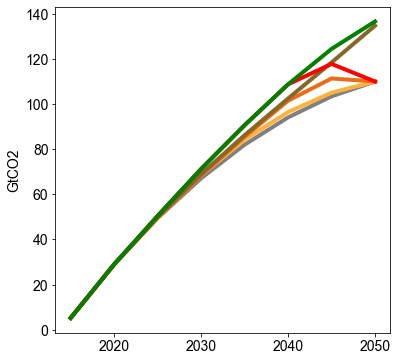

In [5]:
#cumulative

#calculating
ES_c=[]
Total=0
for i in range(len(df['year'])):

    year = df['year'].iloc[i]
    emission =ES.iloc[i]
    if year == 2015:
        ES_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+ES.iloc[i-1])
        Total = Total + total
        ES_c.append(Total)

E2030_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2030.iloc[i]
    if year == 2015:
        E2030_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+E2030.iloc[i-1])
        Total = Total + total
        E2030_c.append(Total)

E2040_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040.iloc[i]
    if year == 2015:
        E2040_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040.iloc[i-1])
        Total = Total + total
        E2040_c.append(Total)
E2050_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2050[i]
    if year == 2015:
        E2050_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2050[i-1])
        Total = Total + total
        E2050_c.append(Total)

# E2030_ct=[]
# Total = 0
# for i in range(len(df['year'])):
#     year = df['year'].iloc[i]
#     emission =E2030Trump.iloc[i]
#     if year == 2015:
#         E2030_ct.append(emission)
#         Total = Total + emission
#     else:
#         total=1/2*5*(emission+E2030Trump.iloc[i-1])
#         Total = Total + total
#         E2030_ct.append(Total)

E2040_ct=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040Trump.iloc[i]
    if year == 2015:
        E2040_ct.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040Trump.iloc[i-1])
        Total = Total + total
        E2040_ct.append(Total)
        
E2040_ct_lowAm=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040Trump_lowAm.iloc[i]
    if year == 2015:
        E2040_ct_lowAm.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040Trump_lowAm.iloc[i-1])
        Total = Total + total
        E2040_ct_lowAm.append(Total)
        
        
ES_c= [x / 1000 for x in ES_c]
E2030_c=[x / 1000 for x in E2030_c]
E2040_c=[x / 1000 for x in E2040_c]
E2050_c=[x / 1000 for x in E2050_c]
# E2030_ct=[x / 1000 for x in E2030_ct]
E2040_ct=[x / 1000 for x in E2040_ct]
# E2040_ct=[x / 1000 for x in E2040_ct]
E2040_ct_lowAm=[x / 1000 for x in E2040_ct_lowAm]

#plotting
plt.figure(figsize=(6, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14


# plt.plot(time,ES_c, color='gray', linewidth=4)
plt.plot(time,ES_c, color='grey', linewidth=4)
plt.plot(time,E2030_c, color= '#FFB23D', linewidth=4)
plt.plot(time,E2040_c, color = '#EC6D18', linewidth=4)
plt.plot(time,E2050_c, color='#856727', linewidth=4)
# plt.plot(time,E2030_ct, color= 'red', linewidth=4)
plt.plot(time,E2040_ct, color = 'red', linewidth=4)
plt.plot(time,E2040_ct_lowAm, color = 'green', linewidth=4)

plt.ylabel("GtCO2")



stick-80 163.44665999999995
2030nl-80 180.85031999999998
2030l-80 100.62737999999999
2040nl-80 228.73913999999996
2040l-80 153.98423999999997
2040nl-trump 253.43495999999996
crt2040_60p_nl_202502_trump_sameEnd 145.99277999999998


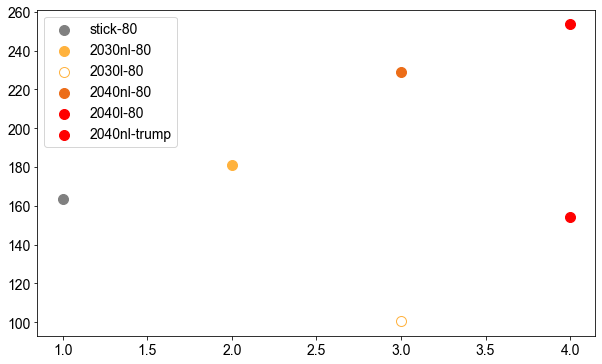

In [ ]:
# carbon price
CP = pd.read_excel("Carbon pricing_Paper_202502.xlsx", sheet_name="Sheet1", index_col='Scenario')

CPscenarios = ['stick-80', '2030nl-80', '2030l-80', '2040nl-80', '2040l-80', '2040nl-trump','crt2040_60p_nl_202502_trump_sameEnd']
xaxis = [1,2,3,3,4,4]
CP_plot = []
for scenario in CPscenarios:
    if scenario in CP.index:
        price_value = CP.loc[scenario, 'Price202502-unitConv']
        print(scenario, price_value)
        CP_plot.append(price_value)  
    else:
        print(f"Scenario {scenario} not found in the index")

markers = ['o', 'o', 'o', 'o','o','o']  
colors = ['grey', '#FFB23D', '#FFB23D', '#EC6D18','red','red']
fillstyles = ['grey', '#FFB23D', 'white', '#EC6D18','red','red']  # 'none' 表示空心

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(zip(xaxis, CP_plot)):
    if y is not None:
        plt.scatter(x, y, color=colors[i], marker=markers[i], facecolors=fillstyles[i], edgecolors=colors[i], s=100, label=CPscenarios[i])

plt.legend()
plt.xticks()
# plt.ylim(0, 220)
plt.show()


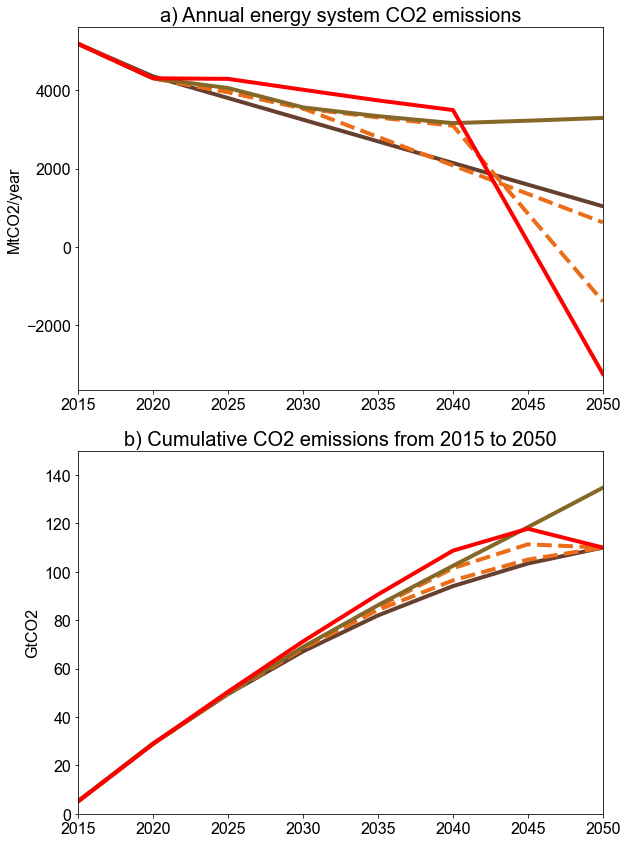

In [ ]:
#plotting code
fig = plt.figure(figsize=(9, 12))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16



# gs = fig.add_gridspec(1,2)
gs = fig.add_gridspec(2,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

ax1.plot(time,ES, color='#673F2F', linewidth=4)
ax1.plot(time,E2030, color= '#EC6D18', linewidth=4,linestyle = "--")
ax1.plot(time,E2040 , color = '#EC6D18', linewidth=4,linestyle = "--")
ax1.plot(time,E2050 , color = '#856727', linewidth=4, linestyle = "-")
ax1.plot(time,E2040Trump, color= 'red', linewidth=4,linestyle = "-")
# ax1.plot(time,E2040Trump, color = '#800020', linewidth=4,linestyle = "--")
ax1.set_ylabel("MtCO2/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='#673F2F', linewidth=4)
ax2.plot(time,E2030_c, color= '#EC6D18', linewidth=4, linestyle = "--")
ax2.plot(time,E2040_c, color = '#EC6D18', linewidth=4, linestyle = "--")
ax2.plot(time,E2050_c, color='#856727', linewidth=4, linestyle = "-")
# plt.plot(time,E2030_ct, color= 'red', linewidth=4, linestyle = "-")
plt.plot(time,E2040_ct, color = 'red', linewidth=4, linestyle = "-")
ax2.set_ylabel("GtCO2")
ax2.set_xlim(2015, 2050)
ax2.set_ylim(0, 150)



ax1.set_title("a) Annual energy system CO2 emissions",  fontsize = 20)
ax2.set_title("b) Cumulative CO2 emissions from 2015 to 2050", fontsize = 20)
# ax3.set_title("c) CO2 prices in 2050", fontsize = 16)

plt.tight_layout()
# fig.savefig("emissions_and_price_20250226.svg", transparent=True)

# plt.show()

stick-80 163.44665999999995
2030nl-80 180.85031999999998
2030l-80 100.62737999999999
2040nl-80 228.73913999999996
2040l-80 153.98423999999997
2040nl-trump 253.43495999999996


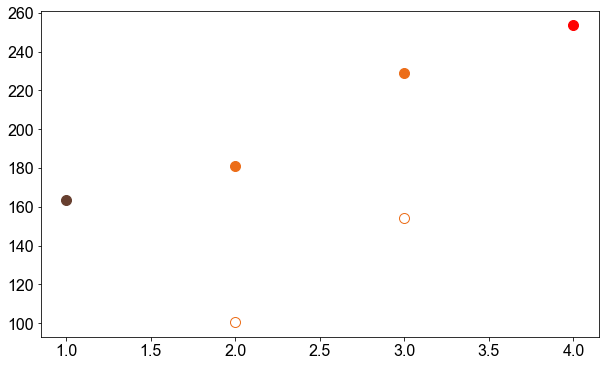

In [ ]:
# carbon price

CP = pd.read_excel("Carbon pricing_Paper_202502.xlsx", sheet_name="Sheet1", index_col='Scenario')

CPscenarios = ['stick-80', '2030nl-80', '2030l-80', '2040nl-80', '2040l-80',
               #'2030nl-trump', '2030l-trump' #, 
               '2040nl-trump'
               #, '2040l-trump'
              ]
xaxis = [1,2,2,3,3, 4, 4, 5, 5]
CP_plot = []
for scenario in CPscenarios:
    if scenario in CP.index:
        price_value = CP.loc[scenario, 'Price202502-unitConv']
        print(scenario, price_value)
        CP_plot.append(price_value)  
    else:
        print(f"Scenario {scenario} not found in the index")
# print(CP_plot)  
markers = ['o', 'o', 'o', 'o',"o",'o','o','o','o']  
colors = ['#673F2F', '#EC6D18', '#EC6D18', '#EC6D18',  '#EC6D18',
          'red'
          #, 'red', '#800020','#800020'
         ]
fillstyles = ['#673F2F', '#EC6D18', 'white', '#EC6D18', "white", "red"
              #, "white","#800020", "white"
             ] 

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(zip(xaxis, CP_plot)):
    if y is not None:
        plt.scatter(x, y, color=colors[i], marker=markers[i], facecolors=fillstyles[i], edgecolors=colors[i], s=100, label=CPscenarios[i])

# plt.legend()
plt.xticks()
# plt.ylim(0, 220)

plt.show()



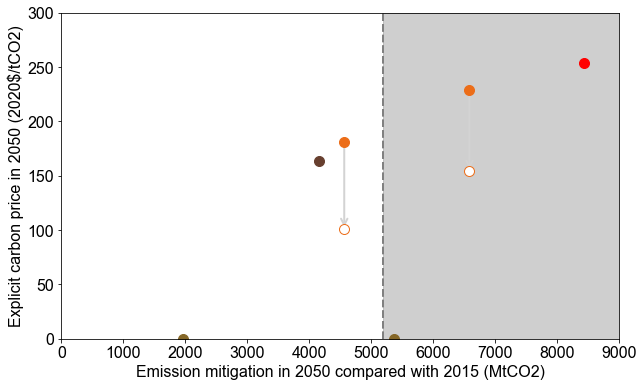

In [ ]:
# something like MAC curve:
aa= - ES.iloc[-1] + ES.iloc[0]
bb= - E2030.iloc[-1] + E2030.iloc[0]
cc= - E2040.iloc[-1] + E2040.iloc[0]
# dd = - E2030Trump.iloc[-1] + E2030Trump.iloc[0]
ee = - E2040Trump.iloc[-1] + E2040Trump.iloc[0]
xaxis2=[aa, bb, bb, cc, cc,# dd, dd, 
        ee#, ee
       ]


CPscenarios = ['stick-80p', '2030nl-80p', '2030l-80p', '2040nl-80p', '2040l-80p',
               #'2030nl-trump', '2030l-trump'#,
               '2040nl-trump' #, '2040l-trump'
              ]


plt.figure(figsize=(10, 6))

markers = ['o', 'o', 'o', 'o',"o",'o','o','o','o']  
colors = ['#673F2F', '#EC6D18', '#EC6D18', '#EC6D18',  '#EC6D18','red'#, 'red', '#800020','#800020'
         ]
fillstyles = ['#673F2F', '#EC6D18', 'white', '#EC6D18', "white", "red"#, "white","#800020", "white"
             ] 

custom_labels = ['Stick only', 'Carrots w/ Quick Stick', 'Carrots w/ Quick Stick (Accelerated Innovation)',
                     'Carrots w/ Slow Stick', 'Carrots w/ Slow Stick (Accelerated Innovation)',
                 #'Carrots w/ Quick Stick, Trump 2.0', 'Carrots w/ Quick Stick (Accelerated Innovation), Trump 2.0',
                     'Carrots w/ Slow Stick, Trump 2.0',# 'Carrots w/ Slow Stick (Accelerated Innovation), Trump 2.0',
                
                ]  
for i, (x, y) in enumerate(zip(xaxis2, CP_plot)):
    if y is not None:
        plt.scatter(x, y, color=colors[i], marker=markers[i], facecolors=fillstyles[i], edgecolors=colors[i],
                    s=100, label=custom_labels[i], zorder = 2)

# plt.annotate('', xy=(xaxis2[1], CP_plot[1]), xytext=(xaxis2[0], CP_plot[0]),
#              arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)
plt.annotate('', xy=(xaxis2[2], CP_plot[2]), xytext=(xaxis2[1], CP_plot[1]),
             arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)
# plt.annotate('', xy=(xaxis2[3], CP_plot[3]), xytext=(xaxis2[1], CP_plot[1]),
#              arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)
plt.annotate('', xy=(xaxis2[4], CP_plot[4]), xytext=(xaxis2[3], CP_plot[3]),
             arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)
# plt.annotate('', xy=(xaxis2[6], CP_plot[6]), xytext=(xaxis2[5], CP_plot[5]),
#              arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)
# plt.annotate('', xy=(xaxis2[8], CP_plot[8]), xytext=(xaxis2[7], CP_plot[7]),
#              arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)

plt.scatter([1963.86], [0], color="#856727", s=100, zorder = 1, label = "Carrot-only")
plt.scatter([5364.73], [0], color="#856727", s=100, zorder = 1, label = "Carrot-only, w/ Accelerated innovation")

plt.xticks()
plt.ylim(0, 300)
# plt.xlim(0, 7000)
plt.xlabel("Emission mitigation in 2050 compared with 2015 (MtCO2)")
plt.ylabel("Explicit carbon price in 2050 (2020$/tCO2)")

# Ensure the x-axis covers the entire desired range
plt.xlim(0, 9000)

# Draw vertical line and shade the right side
plt.axvline(x=5188.91, color='grey', linestyle='--', linewidth=2, zorder=1)
plt.axvspan(5188.91, 9000, color='grey', alpha=0.3, zorder=0)  # Adjusted upper limit

plt.axvline(x=5188.91, color='grey', linestyle='--', linewidth=2, zorder=1)
plt.axvspan(5188.91, plt.xlim()[1], color='grey', alpha=0.1, zorder=0)  

# plt.savefig("Figure3_202502_final.svg", transparent = True)
plt.show()


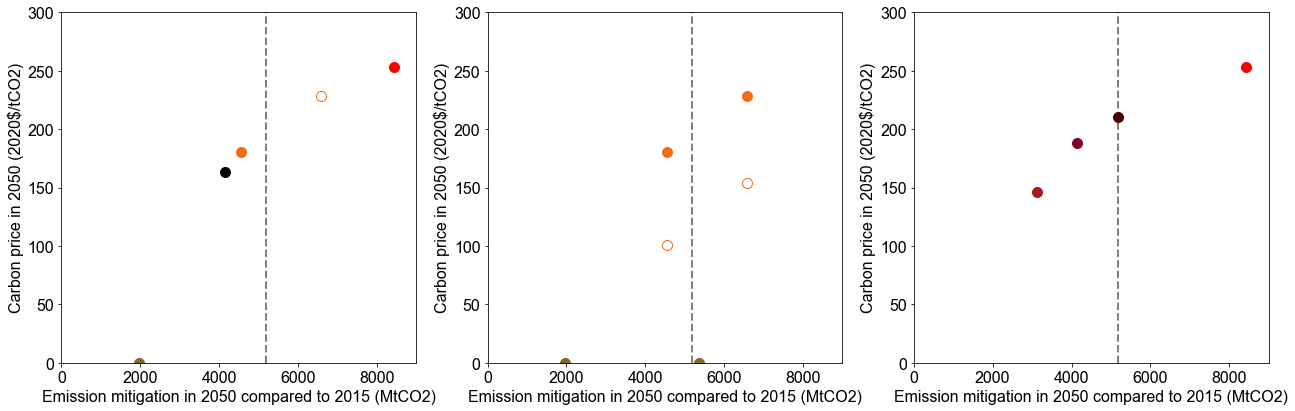

In [ ]:
#RR2: plot a 3-panel figure
fig = plt.figure(figsize=(18, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16

# gs = fig.add_gridspec(1,2)
gs = fig.add_gridspec(1,3)
ax1 = fig.add_subplot(gs[0,0], sharey=ax1)
ax2 = fig.add_subplot(gs[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs[0,2], sharey=ax1)

aa= - ES.iloc[-1] + ES.iloc[0]
bb= - E2030.iloc[-1] + E2030.iloc[0]
cc= - E2040.iloc[-1] + E2040.iloc[0]
# dd = - E2030Trump.iloc[-1] + E2030Trump.iloc[0]
ee = - E2040Trump.iloc[-1] + E2040Trump.iloc[0]
ff = - E2040Trump_lowAm.iloc[-1] + E2040Trump_lowAm.iloc[0]
gg = - E2040Trump_midAm.iloc[-1] + E2040Trump_midAm.iloc[0]
hh = - E2040Trump_highAm.iloc[-1] + E2040Trump_highAm.iloc[0]

CPscenarios1 = ['stick-80', '2030nl-80', '2040nl-80','2040nl-trump'
              ]
CPscenarios2 = [ '2030nl-80', '2030l-80', '2040nl-80','2040l-80'
              ]
CPscenarios3 = [ '2040nl-trump', 'crt2040_60p_nl_202502_trump_sameEnd', 'crt2040_80p_nl_202502_trump_sameEnd',
                'crt2040_100p_nl_202502_trump_sameEnd'
              ]
x1=[aa,bb,cc, ee]
x2=[bb,bb,cc,cc]
x3=[ee,ff,gg,hh]

def get_cp_prices(scenarios, CP_df):
    result = []
    for scenario in scenarios:
        if scenario in CP_df.index:
            result.append(CP_df.loc[scenario, 'Price202502-unitConv'])
        else:
            print(f"[Warning] Scenario '{scenario}' not found.")
            result.append(None)
    return result

y1 = get_cp_prices(CPscenarios1, CP)
y2 = get_cp_prices(CPscenarios2, CP)
y3 = get_cp_prices(CPscenarios3, CP)


colors1 = ['black', '#EC6D18', '#EC6D18',"red"]
fillstyles1 = ['black', '#EC6D18', 'white',"red"]
labels1 = ['Stick only', 'Carrots w/ Quick Stick', 'Carrots w/ Slow Stick',"Inconsistent carrots w/ late stick"]

colors2 = ['#EC6D18', '#EC6D18', '#EC6D18', '#EC6D18']
fillstyles2 = ['#EC6D18', 'white', '#EC6D18', 'white']
labels2 = ['Carrots w/ Quick Stick', 'Carrots w/ Quick Stick (Accelerated Innovation)',
           'Carrots w/ Slow Stick', 'Carrots w/ Slow Stick (Accelerated Innovation)']

colors3 = ['red', '#A61B1B', '#800020', '#4B0000']
fillstyles3 = ['red', '#A61B1B', '#800020', '#4B0000']
labels3 = ['Inconsistent carrots with slow stick, under extreme ambition',
           'Inconsistent carrots with slow stick, under low ambition',
           'Inconsistent carrots with slow stick, under medium ambition', 
           'Inconsistent carrots with slow stick, under high ambition']

def plot_panel(ax, x, y, colors, fills, labels, draw_arrows=True):
    for i in range(len(x)):
        if y[i] is not None:
            ax.scatter(x[i], y[i], color=colors[i], facecolors=fills[i],
                       edgecolors=colors[i], marker='o', s=100, label=labels[i], zorder=2)


    ax.axvline(x=5188.91, color='grey', linestyle='--', linewidth=2, zorder=1)
#     ax.axvspan(5188.91, 9000, color='none', alpha=0.1, zorder=0)

    ax.set_xlim(0, 9000)
    ax.set_ylim(0, 300)
    ax.set_xlabel("Emission mitigation in 2050 compared to 2015 (MtCO2)")
    ax.set_ylabel("Carbon price in 2050 (2020$/tCO2)")
plot_panel(ax1, x1, y1, colors1, fillstyles1, labels1)
plot_panel(ax2, x2, y2, colors2, fillstyles2, labels2)
plot_panel(ax3, x3, y3, colors3, fillstyles3, labels3)

ax1.scatter([1963.86], [0], color="#856727", s=100, zorder = 1, label = "Carrot-only")
ax2.scatter([1963.86], [0], color="#856727", s=100, zorder = 1, label = "Carrot-only")
ax2.scatter([5364.73], [0], color="#856727", s=100, zorder = 1, label = "Carrot-only, w/ Accelerated innovation")
# ax1.legend(loc='upper left', frameon=False)
# ax2.legend(loc='upper left', frameon=False)
# ax3.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.savefig("Figure3_3panels.svg", transparent=True)
plt.show()